In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('F2.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Q1

In [5]:
fare_mean = df['Fare'].mean()

In [6]:
fare_mean

32.2042079685746

In [7]:
fare_median = df['Fare'].median()

In [8]:
fare_median

14.4542

In [9]:
fare_SD = df['Fare'].std()

In [10]:
fare_SD

49.693428597180905

### If mean is greater than median than distribution is positively skewed, in Fare mean > median so Fare distribution is positively skewed

# Q2

In [11]:
most_common_age = df['Age'].mode()

In [12]:
most_common_age

0    24.0
dtype: float64

In [13]:
import statistics

In [14]:
statistics.mode(df['Age'])


24.0

# Replace all missing age

In [15]:
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [16]:
def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [17]:
df['Title'] =  df.Name.map(lambda x : get_title(x))

In [18]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [19]:
df.Age.isnull().any()

False

# divide age in four segment

In [20]:
#age segment
df['Age_seg'] = -888
i = 0;
for x in df['Age']:
    if (x < 15):
        df.loc[i,'Age_seg'] = 'child'
    elif (15 < x < 35):
        df.loc[i,'Age_seg'] = 'young'
    elif (35< x < 50):
        df.loc[i,'Age_seg'] = 'adult'
    else:
        df.loc[i,'Age_seg'] = 'older'
    i+=1

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_seg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,older
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,older


In [22]:
df.groupby('Age_seg').Fare.mean()

Age_seg
adult    42.726108
child    31.688466
older    53.376015
young    25.131434
Name: Fare, dtype: float64

# box plot of age on categorical variable class
                             
# Q3

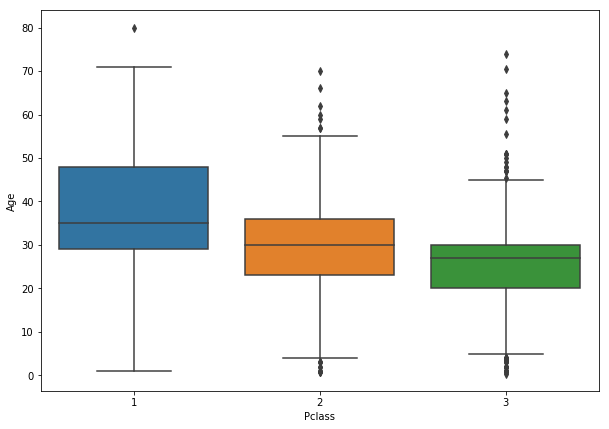

In [23]:
f,axis=plt.subplots(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df[df.Age.notnull()])

# Q4 hypothesis testing

In [24]:
from scipy import stats

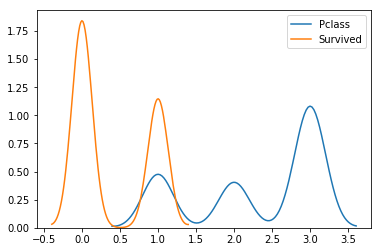

In [31]:
sns.kdeplot(df['Pclass'])
sns.kdeplot(df['Survived'])

#### above graph shows that both column (Pclass and Survived) are discrete so I choose chi-squared goodness of fit test  

# <font color = "red">null hypothesis </font>: Upperclass and other class are indifference from survival
# <font color = "red">alternate hypothesis </font>: upper class have a higher survival rate


In [40]:
df[df['Pclass']==1].groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_seg
Survived,,,,,,,,,,,,,
0,80,80,80,80,80,80,80,80,80,59,80,80,80
1,136,136,136,136,136,136,136,136,136,117,134,136,136


In [41]:
df[df['Pclass']!=1].groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_seg
Survived,,,,,,,,,,,,,
0,469,469,469,469,469,469,469,469,469,9,469,469,469
1,206,206,206,206,206,206,206,206,206,19,206,206,206


In [59]:
chi_test = pd.DataFrame(columns = ['Survived','Not Survived'])

In [60]:
chi_test['Survived'] = [136,206]

In [61]:
chi_test['Not Survived'] = [80,469]

In [62]:
chi_test.rename(index = {0:'upper class', 1:'other class'},inplace = True)

In [63]:
chi_test

,Survived,Not Survived
upper class,136,80
other class,206,469


In [71]:
chi_squared,p_value,dof,expected=stats.chi2_contingency(chi_test)

In [73]:
print(chi_squared,p_value,dof,expected)

71.46583854616048 2.821002116713336e-17 1 [[ 82.90909091 133.09090909]
 [259.09090909 415.90909091]]


In [78]:
if(p_value <= 0.01):
    print("Very strong presumption against null hypothesis")
elif (0.01 < p_value and p_value <= 0.05):
    print("Strong presumption against null hypothesis")
elif (0.05 < p_value and p_value <= 0.1):
    print("Low presumption against null hypothesis")
else:
    print("No presumption against null hypothesis")

Very strong presumption against null hypothesis


# since p_value is very small so we neglect null hypothesis and take alternate

# Q5  interdependence of gender and Pclass on survival

# <font color = "red">null hypothesis </font>: survival is independent from Gender and Pclass
# <font color = "red">alternate hypothesis </font>: survival is dependent on Gender and Pclass

In [29]:
from scipy.stats import chi2_contingency

In [43]:
table = pd.crosstab(df['Sex'],df['Pclass'])

In [44]:
table

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [47]:
stats.chi2_contingency(observed=table)

(16.971499095517114,
 0.00020638864348233114,
 2,
 array([[ 76.12121212,  64.84399551, 173.03479237],
        [139.87878788, 119.15600449, 317.96520763]]))

In [48]:
p_value = 0.00020638864348233114

In [49]:
if(p_value <= 0.01):
    print("Very strong presumption against null hypothesis")
elif (0.01 < p_value and p_value <= 0.05):
    print("Strong presumption against null hypothesis")
elif (0.05 < p_value and p_value <= 0.1):
    print("Low presumption against null hypothesis")
else:
    print("No presumption against null hypothesis")

Very strong presumption against null hypothesis


# since p_value is very small so we neglect null hypothesis and take alternate
# survival is dependent on Gender and Pclass

# Q6  correlation between variables Fare and Age

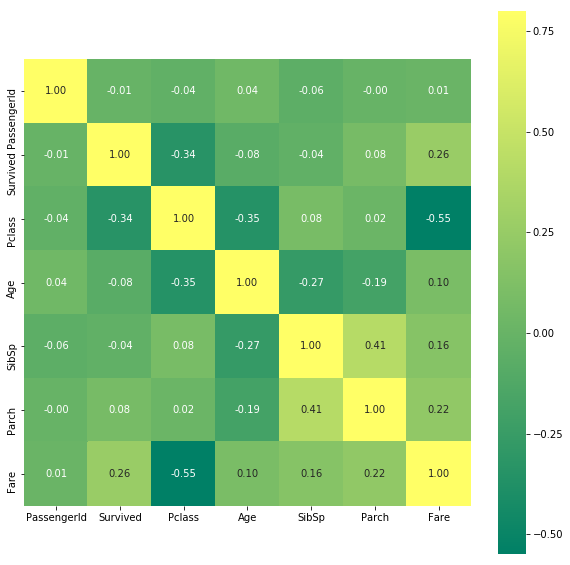

In [216]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmat,vmax = 0.8,square = True,annot = True,fmt = '.2f',cmap = "summer")

In [217]:
corr_fare_age = df['Fare'].corr(df['Age'])

In [218]:
corr_fare_age

0.09794425947949432